In [33]:
%load_ext autoreload
%autoreload 2
from copy import copy, deepcopy
from collections import defaultdict
from random import sample, randint
from busca.classes import ALTURAS, COLUNAS
from busca.classes.gerente import GerenteRemocao
from busca.classes.patio import Container, Pilha, Patio

from busca.utils import gera_agendamento_containers, gera_containers_transito
from busca.utils.simulador import Simulador


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
results = defaultdict(dict)
for perc in [.1, .7]:
    simulador = Simulador()
    simulador.generate_env()
    for mode_out in ['nenhum', 'ordered', 'stay']:
        sub_results = defaultdict(list)
        for mode_in in ['like', 'nenhum']:
            for turns in [100]:
                for tamanho_fila in [10, 20, 30, 40, 50]:
                    lsimulador = deepcopy(simulador)
                    lsimulador.initialize_gerente(mode=mode_in)
                    lsimulador.turns = turns
                    lsimulador.tamanho_fila = tamanho_fila
                    media = lsimulador.run_monte_carlo(mode_in=mode_in)
                    sub_results[mode_in].append((turns, tamanho_fila, media))
        results[perc][mode_out] = sub_results

Modo like
Média de remoções: 0.2578571428571429
Total gatein: 857 gateout:857
Modo like
Média de remoções: 0.3096973684210526
Total gatein: 1665 gateout:1665
Modo like
Média de remoções: 0.6315509929406482
Total gatein: 2776 gateout:2776
Modo like
Média de remoções: 0.8854963148515782
Total gatein: 3415 gateout:3415
Modo like
Média de remoções: 1.127280976976051
Total gatein: 4337 gateout:4337
Modo nenhum
Média de remoções: 0.2885793650793651
Total gatein: 903 gateout:903
Modo nenhum
Média de remoções: 0.4206006191950466
Total gatein: 1704 gateout:1704
Modo nenhum
Média de remoções: 0.43983430873086043
Total gatein: 2307 gateout:2307
Modo nenhum
Média de remoções: 0.816534409047567
Total gatein: 3411 gateout:3411
Modo nenhum
Média de remoções: 1.2394280826206527
Total gatein: 4822 gateout:4822
Modo like
Média de remoções: 0.15388888888888888
Total gatein: 937 gateout:937
Modo like
Média de remoções: 0.36833862229102166
Total gatein: 1614 gateout:1614
Modo like
Média de remoções: 0.6132

In [63]:
print(results)

defaultdict(<class 'dict'>, {0.1: {'nenhum': defaultdict(<class 'list'>, {'like': [(100, 10, 0.2578571428571429), (100, 20, 0.3096973684210526), (100, 30, 0.6315509929406482), (100, 40, 0.8854963148515782), (100, 50, 1.127280976976051)], 'nenhum': [(100, 10, 0.2885793650793651), (100, 20, 0.4206006191950466), (100, 30, 0.43983430873086043), (100, 40, 0.816534409047567), (100, 50, 1.2394280826206527)]}), 'ordered': defaultdict(<class 'list'>, {'like': [(100, 10, 0.15388888888888888), (100, 20, 0.36833862229102166), (100, 30, 0.6132579849269505), (100, 40, 0.8149468252231407), (100, 50, 1.0846957266409494)], 'nenhum': [(100, 10, 0.3875), (100, 20, 0.5246842105263159), (100, 30, 0.6547423041836836), (100, 40, 0.9223205267152637), (100, 50, 0.9050520566536823)]}), 'stay': defaultdict(<class 'list'>, {'like': [(100, 10, 0.19728571428571423), (100, 20, 0.5531553147574819), (100, 30, 0.4759764894109724), (100, 40, 0.7679194087088824), (100, 50, 1.0162475225551213)], 'nenhum': [(100, 10, 0.248

0.1 nenhum
0.1 ordered
0.1 stay
0.7 nenhum
0.7 ordered
0.7 stay


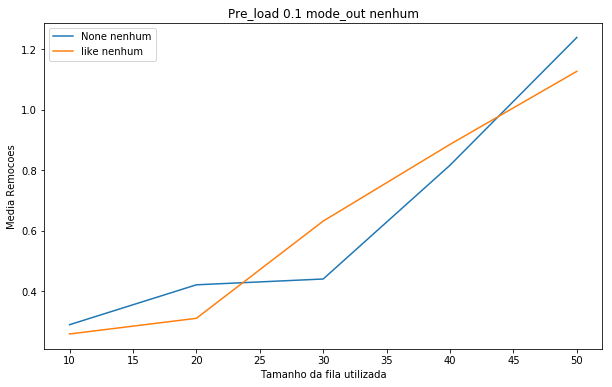

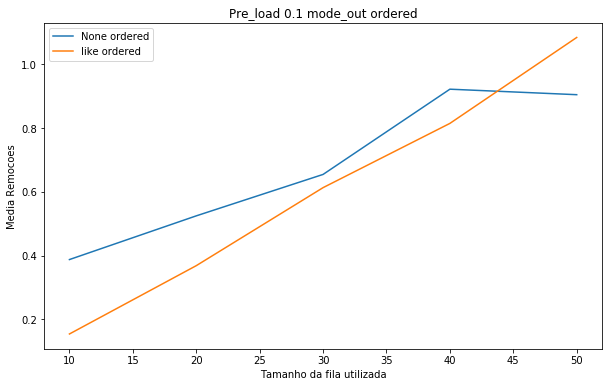

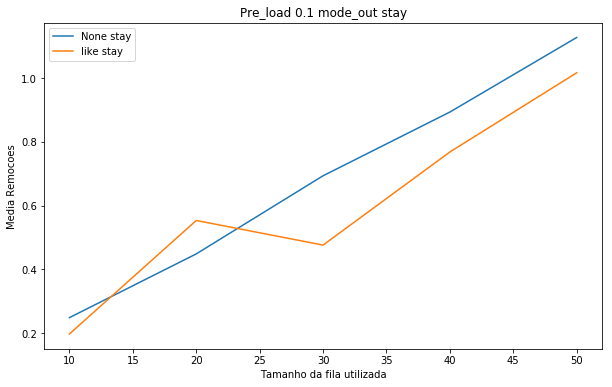

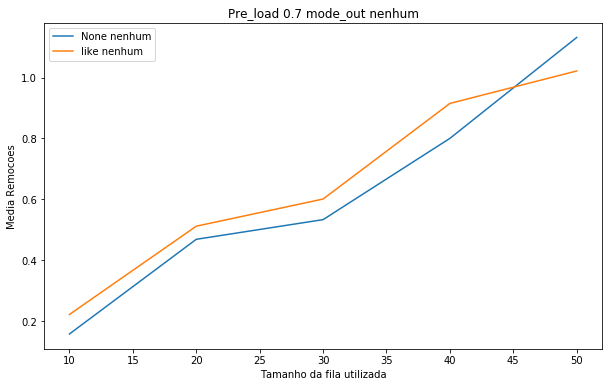

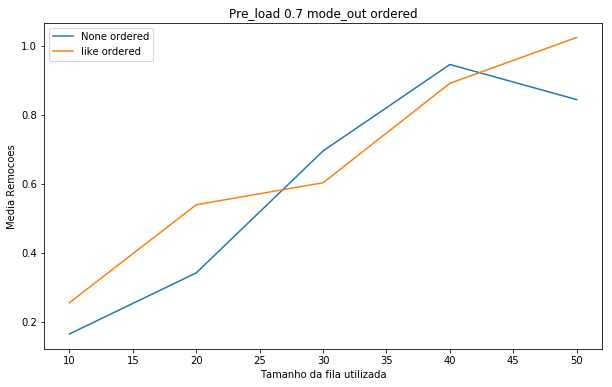

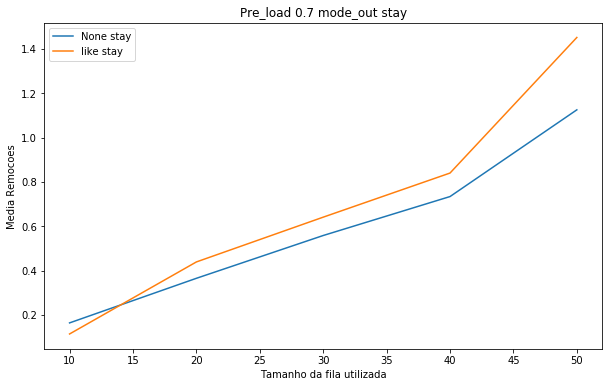

In [64]:
for perc, values in results.items():
    for mode_out, sub_results in values.items():
        print(perc, mode_out)
        y_none = [x[2] for x in sub_results['nenhum']]
        y_like = [x[2] for x in sub_results['like']]
        x = [x[1] for x in sub_results['like']]
        fig = plt.figure(figsize=(10, 6))
        plt.title('Pre_load %s mode_out %s' % (perc, mode_out))
        plt.plot(x, y_none, label='None %s' % mode_out)
        plt.plot(x, y_like, label='like %s' % mode_out)
        plt.legend()
        plt.ylabel('Media Remocoes')
        plt.xlabel('Tamanho da fila utilizada')